In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime
import os

In [2]:
# Функция для создания директории с текущей датой

def create_date_directory():
    current_date = datetime.now().strftime('%Y-%m-%d')
    directory_name = current_date
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    return directory_name

In [3]:
# Функция для сохранения данных в CSV

def save_data_to_csv(df, sensor_positions, directory_name):
    existing_files = [f for f in os.listdir(directory_name) if f.endswith('.csv')]
    next_file_number = len(existing_files) // 2 + 1
    
    # Имена файлов
    data_file_name = f"{directory_name}/data_{next_file_number}.csv"
    sensors_file_name = f"{directory_name}/sensors_{next_file_number}.csv"
    
    # Сохранение координат маяков в отдельный файл
    sensor_df = pd.DataFrame(sensor_positions, columns=['Sensor_X', 'Sensor_Y'])
    sensor_df.to_csv(sensors_file_name, index=False)
    
    # Сохранение данных измерений
    df.to_csv(data_file_name, index=False)
    
    return data_file_name, sensors_file_name


In [4]:
# Функция расчета RSSI

def calculate_rssi(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    
    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance)

In [5]:
# Генерация данных

def generator(
        sensor_positions: list[tuple[int, int]],
        grid_points: list[tuple[float, float]]
) -> pd.DataFrame:
    data = []
    for point in grid_points:
        rssi_values = [calculate_rssi(sensor_pos, point) for sensor_pos in sensor_positions]
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    df = pd.DataFrame(data, columns=columns)

    return df

In [6]:
def visual(df: pd.DataFrame, sensor_positions: list[tuple[int, int]]):
    # Визуализация
    plt.figure(figsize=(8, 6))

    # Тепловая карта сигнала (RSSI)
    plt.scatter(df['x'], df['y'], c=df['Avg_RSSI'], cmap='plasma', s=50, label='Grid Points')
    plt.colorbar(label='RSSI (dBm)')

    # Датчики
    for sensor in sensor_positions:
        plt.scatter(sensor[0], sensor[1], color='lime', edgecolor='black', s=200, marker='^', label='Sensor')

    # Настройки графика
    plt.title('Signal Visualization')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True, alpha=0.2)
    
    # Отображение
    plt.show()

In [7]:
# Генерация датчиков

def get_sensor_positions(n: int, num_sensors: int) -> list[tuple[int, int]]:
    possible_positions = []
    
    # Верхняя и нижняя стены
    for i in range(n):
        possible_positions.append((0, i))  # Верхняя стена
        possible_positions.append((n, i))  # Нижняя стена
    
    # Левая и правая стены (исключая углы, которые уже учтены)
    for i in range(1, n-1):
        possible_positions.append((i, 0))  # Левая стена
        possible_positions.append((i, n))  # Правая стена
    
    if num_sensors > len(possible_positions):
        raise ValueError(f"Запрошено {num_sensors} датчиков, но доступно только {len(possible_positions)} позиций на стенах")
    
    sensor_positions = random.sample(possible_positions, num_sensors)
    return sensor_positions


[(0, 0), (0, 4), (4, 4), (4, 0)]


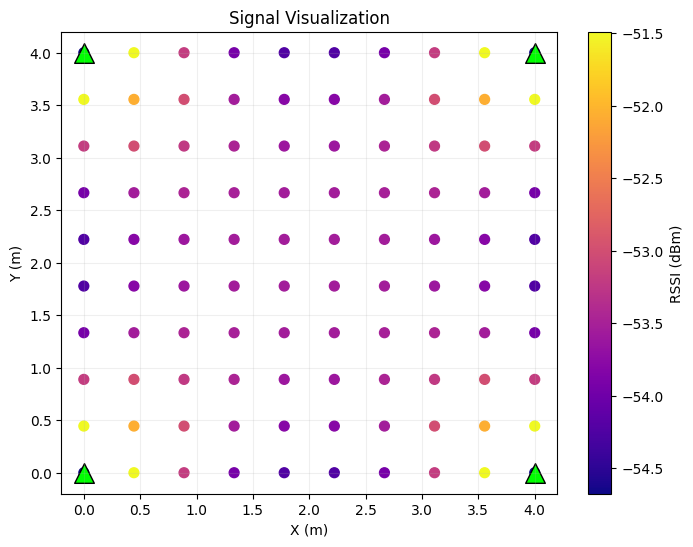

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,Avg_RSSI
0,0.000000,0.0,-40.000000,-58.061800,-62.577250,-58.061800,-54.675212
1,0.444444,0.0,-29.434524,-58.141732,-61.855044,-56.527224,-51.489631
2,0.888889,0.0,-38.465424,-58.375808,-61.143675,-54.787466,-53.193093
3,1.333333,0.0,-43.748162,-58.748162,-60.457312,-52.779062,-53.933175
4,1.777778,0.0,-47.496324,-59.236100,-59.814112,-50.403625,-54.237540
...,...,...,...,...,...,...,...
95,2.222222,4.0,-59.814112,-50.403625,-47.496324,-59.236100,-54.237540
96,2.666667,4.0,-60.457312,-52.779062,-43.748162,-58.748162,-53.933175
97,3.111111,4.0,-61.143675,-54.787466,-38.465424,-58.375808,-53.193093
98,3.555556,4.0,-61.855044,-56.527224,-29.434524,-58.141732,-51.489631


In [8]:
num_points = 10
room_size = 4
num_sensors = 4
sensor_positions = [(0, 0), (0, 4), (4, 4), (4, 0)]

# grid_points = [
#     (0.0, 3.0),
#     (0.0, 2.0),
#     (1.0, 0.0),
#     (2.0, 0.0),
#     (3.0, 0.0),
#     (4.0, 1.0),
#     (4.0, 2.0),
#     (1.0, 4.0),
#     (3.0, 3.5),
#     (3.0, 3.5),
#     (1.5, 3.0),
#     (2.0, 3.0),
#     (1.5, 2.0),
#     (3.0, 3.5),
#     (2.0, 1.0),
#     (2.5, 1.5),
# ]

grid_size = 10
grid_points = []

x = np.linspace(0, room_size, grid_size)
y = np.linspace(0, room_size, grid_size)
xx, yy = np.meshgrid(x, y)
grid_points = list(zip(xx.flatten(), yy.flatten()))


# Случайные генерации
# sensor_positions = get_sensor_positions(room_size, num_sensors)
# x = np.random.uniform(0, room_size, num_points)
# y = np.random.uniform(0, room_size, num_points)
# grid_points = list(zip(x, y))

print(sensor_positions)

df = generator(sensor_positions=sensor_positions, grid_points=grid_points)
visual(df=df, sensor_positions=sensor_positions)

directory_name = create_date_directory()
file_name = save_data_to_csv(df, sensor_positions, directory_name)

df